# Using KGFE to understand important features

Basically, given a list of genes/proteins/metabolites that are mapped onto SPOKE, we want to identify nodes on the graph that are in some way "similar" to the input nodes.

In [1]:
# imports
import numpy as np
import pandas as pd
import networkx as nx
import kgfe

## 1. Load genes

In [2]:
data = pd.read_excel('LC_mets_prots_V1_V2_Compare.xlsx')

In [3]:
data.head()

,ID,Lasso_CV,Name,UniProt,Protein,PubChem,Chembl_ID,KEGG
0,met10,-0.100203,"1,2,4-benzenetriol",NaN,NaN,10787.0,CHEMBL3092389,C02814
1,met1054,-0.052794,pyridine,NaN,NaN,1049.0,CHEMBL266158,C00747
2,met1073,0.051544,uric acid,NaN,NaN,1175.0,CHEMBL792,C00366
3,met1091,-0.054557,formononetin,NaN,NaN,5280378.0,CHEMBL242341,C00858
4,met142,0.025830,4-Hydroxyvalproic acid,NaN,NaN,134467.0,CHEMBL3706504,C16649


In [4]:
data.shape

(92, 8)

In [5]:
data[~data.Chembl_ID.isna()]

,ID,Lasso_CV,Name,UniProt,Protein,PubChem,Chembl_ID,KEGG
0,met10,-0.100203,"1,2,4-benzenetriol",NaN,NaN,10787.0,CHEMBL3092389,C02814
1,met1054,-0.052794,pyridine,NaN,NaN,1049.0,CHEMBL266158,C00747
2,met1073,0.051544,uric acid,NaN,NaN,1175.0,CHEMBL792,C00366
3,met1091,-0.054557,formononetin,NaN,NaN,5280378.0,CHEMBL242341,C00858
4,met142,0.025830,4-Hydroxyvalproic acid,NaN,NaN,134467.0,CHEMBL3706504,C16649
6,met20,-0.045657,"2,6-dihydroxybenzoic acid",NaN,NaN,9338.0,CHEMBL454808,NaN
11,met305,0.035464,hexadecanedioic acid,NaN,NaN,10459.0,CHEMBL4519590,C19615
12,met31,-0.057506,"3,5-dichlorosalicylic acid",NaN,NaN,9445.0,CHEMBL449129,NaN
15,met53,0.033875,benzyldodecyldimethylammonium,NaN,NaN,8754.0,CHEMBL1907001,NaN
18,met675,0.029451,cytidine,NaN,NaN,596.0,CHEMBL78,NaN


## 2. Load SPOKE

In [6]:
import igraph as ig

In [7]:
spoke_graph = kgfe.spoke_loader.load_spoke_igraph('../../graph_utils/spoke_2023_human.json.gz', directed=True,
                                                    verbose=False)

In [8]:
spoke_graph_ud = spoke_graph.copy()
spoke_graph_ud.to_undirected(combine_edges='first')
spoke_graph_ud.simplify(combine_edges='first')

In [9]:
names_to_ids = kgfe.graph_info.get_names_to_ids(spoke_graph_ud)

### Map proteins and metabolites to SPOKE nodes

In [10]:
len(names_to_ids)

596580

In [11]:
uniprot_to_ids = kgfe.graph_info.spoke_identifiers_to_ids(spoke_graph_ud, 'Protein')

In [12]:
chembl_to_ids = kgfe.graph_info.spoke_identifiers_to_ids(spoke_graph_ud, 'Compound')

In [13]:
high_prots = data[(data['Lasso_CV'] > 0) & (~data['UniProt'].isna())]['UniProt']
low_prots = data[(data['Lasso_CV'] < 0) & (~data['UniProt'].isna())]['UniProt']
high_chems = data[(data['Lasso_CV'] > 0) & (~data['Chembl_ID'].isna())]['Chembl_ID']
low_chems = data[(data['Lasso_CV'] < 0) & (~data['Chembl_ID'].isna())]['Chembl_ID']

In [14]:
high_prots_spoke_ids = [uniprot_to_ids[x] for x in high_prots]
low_prots_spoke_ids = [uniprot_to_ids[x] for x in low_prots]

In [15]:
high_prots_spoke_ids[:10]

['10584',
 '10618',
 '10577',
 '14694',
 '3393',
 '479',
 '3332',
 '10685',
 '3508',
 '19496']

In [16]:
high_chems_spoke_ids = [(x, chembl_to_ids[x]) for x in high_chems if  x in chembl_to_ids]
low_chems_spoke_ids = [(x, chembl_to_ids[x]) for x in low_chems if  x in chembl_to_ids]

Note: many chems were not able to be mapped onto SPOKE.

In [17]:
high_chems_spoke_ids

[('CHEMBL792', '523510'),
 ('CHEMBL3706504', '535189'),
 ('CHEMBL78', '173395'),
 ('CHEMBL1162484', '525160'),
 ('CHEMBL1236395', '524231'),
 ('CHEMBL8165', '521673'),
 ('CHEMBL1226', '516414')]

In [18]:
low_chems_spoke_ids

[('CHEMBL3092389', '534667'),
 ('CHEMBL266158', '524340'),
 ('CHEMBL242341', '520625'),
 ('CHEMBL454808', '523091'),
 ('CHEMBL449129', '523116'),
 ('CHEMBL228057', '519122'),
 ('CHEMBL366563', '534527'),
 ('CHEMBL1256480', '523670'),
 ('CHEMBL394875', '535751')]

### TODO: Compare the identified nodes against a null model.

In [19]:
spoke_graph_ud_connected = spoke_graph_ud.subcomponent(high_prots_spoke_ids[0])
spoke_graph_ud_connected = spoke_graph_ud.induced_subgraph(spoke_graph_ud_connected)

In [20]:
len(high_prots_spoke_ids)

31

In [21]:
len(low_prots_spoke_ids)

23

In [22]:
%prun high_prots_stats = kgfe.explanations.graph_node_stats(spoke_graph_ud_connected, high_prots_spoke_ids)

         81 function calls in 0.791 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.752    0.752    0.752    0.752 {method 'distances' of 'igraph._igraph.GraphBase' objects}
        1    0.038    0.038    0.038    0.038 {method 'transitivity_local_undirected' of 'igraph._igraph.GraphBase' objects}
        1    0.000    0.000    0.790    0.790 explanations.py:100(graph_node_stats)
        1    0.000    0.000    0.000    0.000 {method 'degree' of 'igraph._igraph.GraphBase' objects}
        1    0.000    0.000    0.791    0.791 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    0.000    0.000 _methods.py:196(_var)
        2    0.000    0.000    0.000    0.000 _methods.py:163(_mean)
        3    0.000    0.000    0.000    0.000 _methods.py:66(_count_reduce_items)
        2    0.000    0.000    0.000    0.000 fromn

In [23]:
%prun high_prots_null_results = kgfe.explanations.null_graph_stats(spoke_graph_ud_connected, 'Protein', len(high_prots_spoke_ids))

IOStream.flush timed out


         641913 function calls (641909 primitive calls) in 208.024 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100  203.072    2.031  203.072    2.031 {method 'distances' of 'igraph._igraph.GraphBase' objects}
      100    3.473    0.035    3.473    0.035 {method 'transitivity_local_undirected' of 'igraph._igraph.GraphBase' objects}
        1    0.672    0.672    0.904    0.904 graph_info.py:236(nodes_in_category)
      100    0.530    0.005  207.108    2.071 explanations.py:100(graph_node_stats)
   597317    0.229    0.000    0.229    0.000 {method 'attributes' of 'igraph.Vertex' objects}
     3000    0.013    0.000    0.013    0.000 {method 'extend' of 'list' objects}
     3100    0.005    0.000    0.005    0.000 {method 'add' of 'set' objects}
      400    0.004    0.000    0.004    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      100    0.003    0.000    0.004    0.000 _methods.py:196(_var)
    21430    

In [24]:
%time low_prots_null_results = kgfe.explanations.null_graph_stats(spoke_graph_ud_connected, 'Protein', len(low_prots_spoke_ids))

CPU times: user 2min 24s, sys: 4.04 s, total: 2min 28s
Wall time: 2min 29s


In [25]:
%time high_prots_stats = kgfe.explanations.graph_node_stats(spoke_graph_ud_connected, high_prots_spoke_ids)

CPU times: user 662 ms, sys: 47.9 ms, total: 710 ms
Wall time: 711 ms


In [26]:
%time low_prots_stats = kgfe.explanations.graph_node_stats(spoke_graph_ud_connected, low_prots_spoke_ids)

CPU times: user 110 ms, sys: 0 ns, total: 110 ms
Wall time: 110 ms


In [27]:
high_prots_null_results = pd.DataFrame(high_prots_null_results)
low_prots_null_results = pd.DataFrame(low_prots_null_results)


In [28]:
high_prots_null_results.mean()

average_pairwise_distance      2.574667
degree_mean                  211.670645
degree_std                   326.515101
clustering                     0.282156
dtype: float64

In [29]:
low_prots_null_results.mean()

average_pairwise_distance      2.556838
degree_mean                  199.704783
degree_std                   282.459354
clustering                     0.284392
dtype: float64

In [31]:
import matplotlib.pyplot as plt

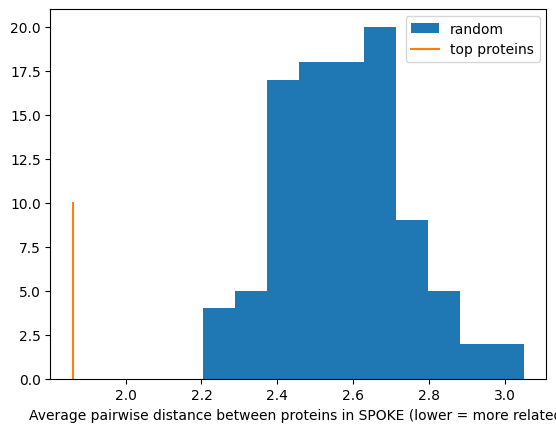

In [32]:
plt.hist(high_prots_null_results.average_pairwise_distance, bins=10, label='random')
plt.plot([high_prots_stats['average_pairwise_distance'], high_prots_stats['average_pairwise_distance']], [0, 10], label='top proteins')
plt.xlabel('Average pairwise distance between proteins in SPOKE (lower = more related)')
plt.legend()

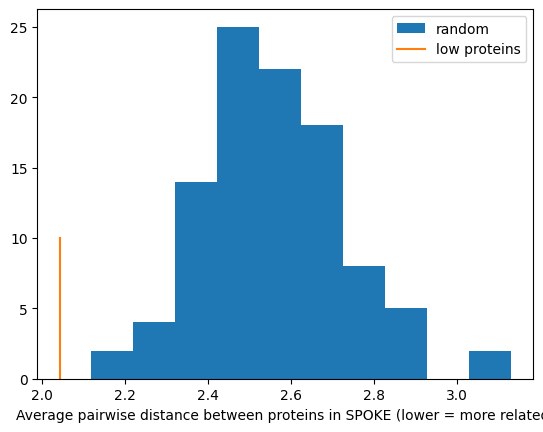

In [33]:
plt.hist(low_prots_null_results.average_pairwise_distance, bins=10, label='random')
plt.plot([low_prots_stats['average_pairwise_distance'], low_prots_stats['average_pairwise_distance']], [0, 10], label='low proteins')
plt.xlabel('Average pairwise distance between proteins in SPOKE (lower = more related)')
plt.legend()

## 3. Run topic PageRank

In [34]:
high_prots_pr_results, high_prots_top_nodes = kgfe.explanations.topic_pagerank(spoke_graph_ud, high_prots_spoke_ids)

In [35]:
low_prots_pr_results, low_prots_top_nodes = kgfe.explanations.topic_pagerank(spoke_graph_ud, low_prots_spoke_ids)

In [36]:
high_chems_pr_results, high_chems_top_nodes = kgfe.explanations.topic_pagerank(spoke_graph_ud, [x[1] for x in high_chems_spoke_ids])

In [37]:
low_chems_pr_results, low_chems_top_nodes = kgfe.explanations.topic_pagerank(spoke_graph_ud, [x[1] for x in low_chems_spoke_ids])

In [38]:
high_prots_top_proteins = [x for x in high_prots_top_nodes if x['category'] == 'Protein']
high_prots_top_genes = [x for x in high_prots_top_nodes if x['category'] == 'Gene']

## 4. Plot PageRank results

In [40]:
import matplotlib.pyplot as plt

### Proteins with positive Lasso_CV scores

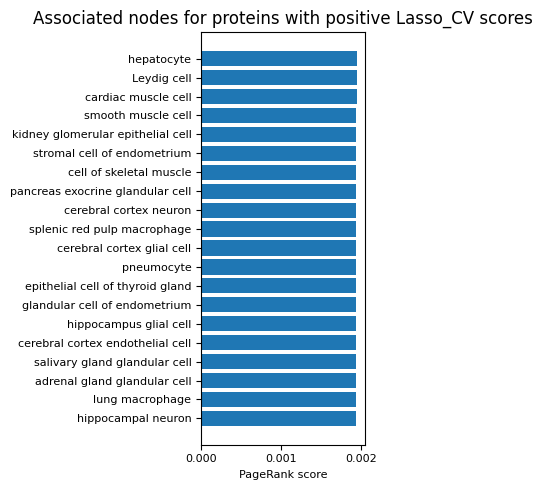

In [41]:
fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in high_prots_top_nodes[:20][::-1]], [x['score'] for x in high_prots_top_nodes[:20][::-1]], )
plt.title('Associated nodes for proteins with positive Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

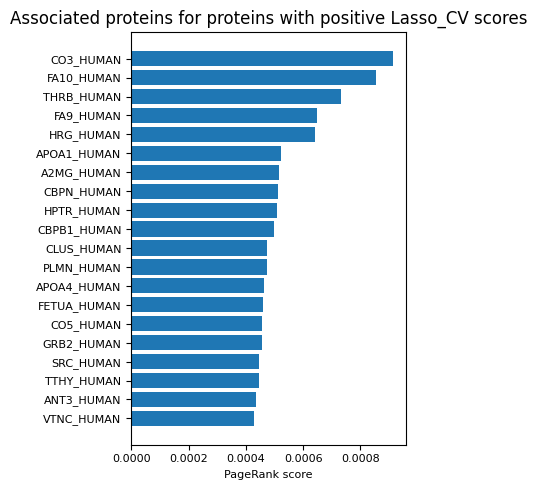

In [42]:
high_prots_top_proteins = [x for x in high_prots_top_nodes if x['category'] == 'Protein']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in high_prots_top_proteins[:20][::-1]], [x['score'] for x in high_prots_top_proteins[:20][::-1]], )
plt.title('Associated proteins for proteins with positive Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

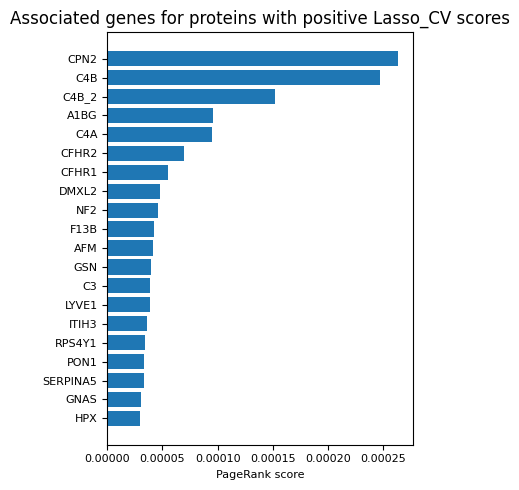

In [43]:
high_prots_top_genes = [x for x in high_prots_top_nodes if x['category'] == 'Gene']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in high_prots_top_genes[:20][::-1]], [x['score'] for x in high_prots_top_genes[:20][::-1]], )
plt.title('Associated genes for proteins with positive Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

### Proteins with negative Lasso_CV scores

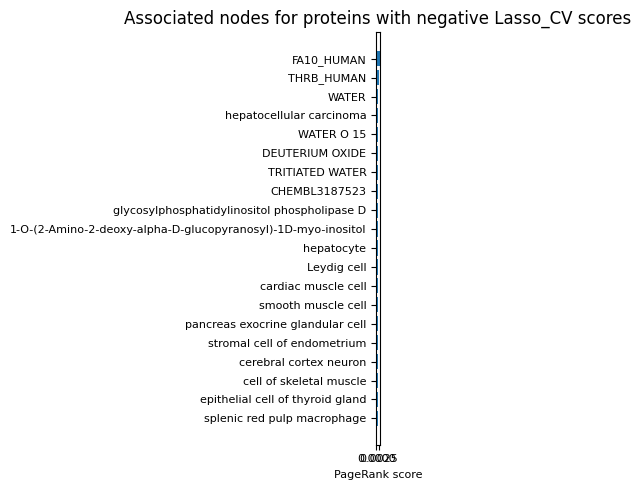

In [44]:
fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in low_prots_top_nodes[:20][::-1]], [x['score'] for x in low_prots_top_nodes[:20][::-1]], )
plt.title('Associated nodes for proteins with negative Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

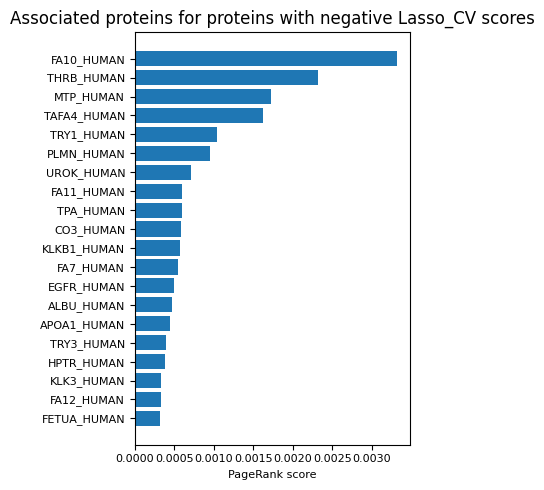

In [45]:
low_prots_top_proteins = [x for x in low_prots_top_nodes if x['category'] == 'Protein']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in low_prots_top_proteins[:20][::-1]], [x['score'] for x in low_prots_top_proteins[:20][::-1]], )
plt.title('Associated proteins for proteins with negative Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

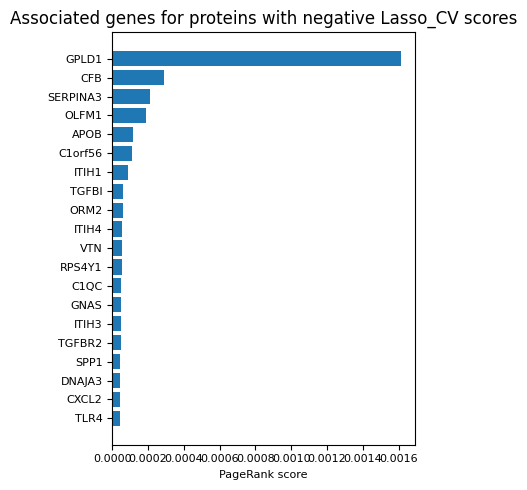

In [46]:
low_prots_top_genes = [x for x in low_prots_top_nodes if x['category'] == 'Gene']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in low_prots_top_genes[:20][::-1]], [x['score'] for x in low_prots_top_genes[:20][::-1]], )
plt.title('Associated genes for proteins with negative Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

### Chems with positive Lasso_CV scores

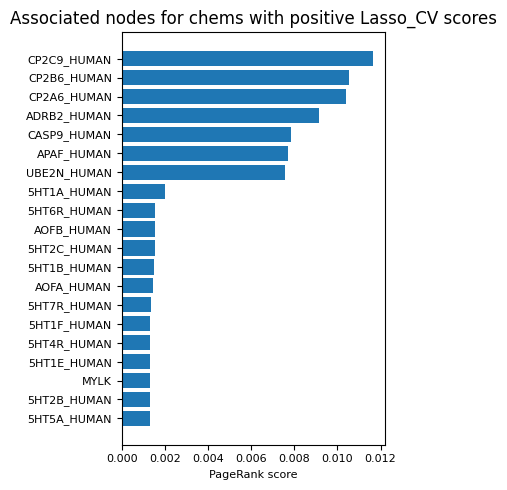

In [47]:
fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in high_chems_top_nodes[:20][::-1]], [x['score'] for x in high_chems_top_nodes[:20][::-1]], )
plt.title('Associated nodes for chems with positive Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

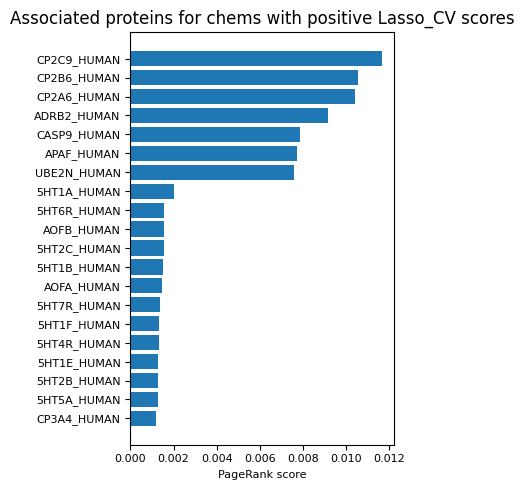

In [48]:
high_chems_top_proteins = [x for x in high_chems_top_nodes if x['category'] == 'Protein']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in high_chems_top_proteins[:20][::-1]], [x['score'] for x in high_chems_top_proteins[:20][::-1]], )
plt.title('Associated proteins for chems with positive Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

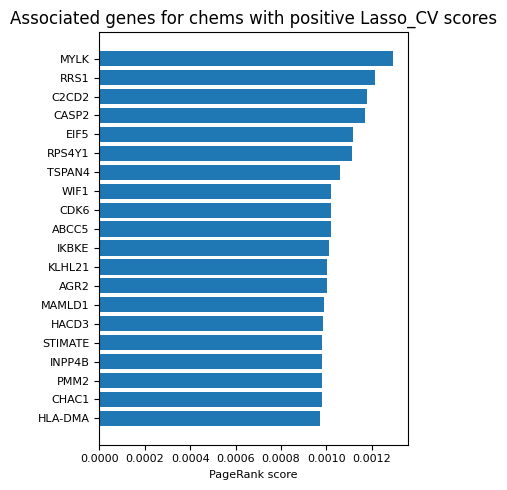

In [49]:
high_chems_top_genes = [x for x in high_chems_top_nodes if x['category'] == 'Gene']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in high_chems_top_genes[:20][::-1]], [x['score'] for x in high_chems_top_genes[:20][::-1]], )
plt.title('Associated genes for chems with positive Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

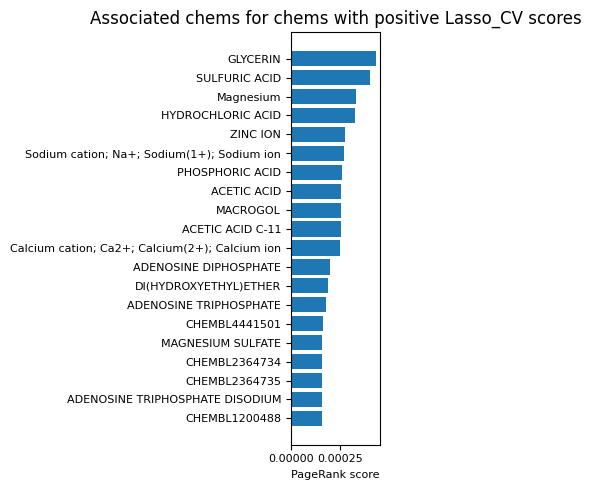

In [50]:
high_chems_top_chems = [x for x in high_chems_top_nodes if x['category'] == 'Compound']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in high_chems_top_chems[:20][::-1]], [x['score'] for x in high_chems_top_chems[:20][::-1]], )
plt.title('Associated chems for chems with positive Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

### Chems with negative Lasso_CV scores

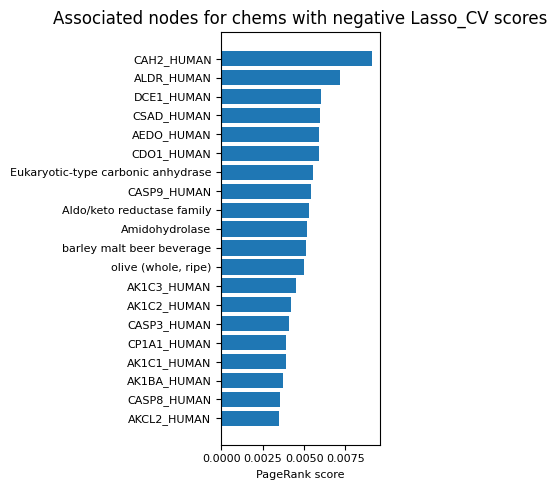

In [51]:
fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in low_chems_top_nodes[:20][::-1]], [x['score'] for x in low_chems_top_nodes[:20][::-1]], )
plt.title('Associated nodes for chems with negative Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

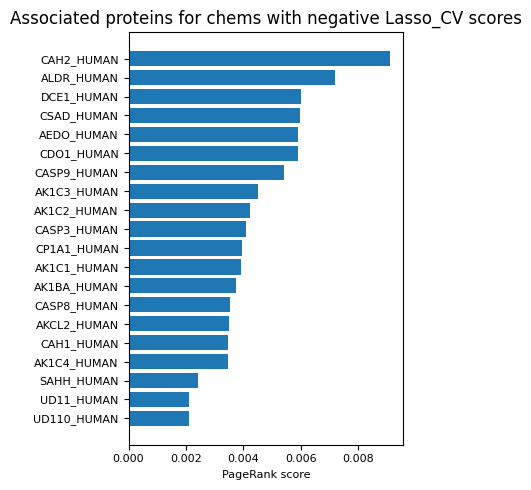

In [52]:
low_chems_top_proteins = [x for x in low_chems_top_nodes if x['category'] == 'Protein']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in low_chems_top_proteins[:20][::-1]], [x['score'] for x in low_chems_top_proteins[:20][::-1]], )
plt.title('Associated proteins for chems with negative Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

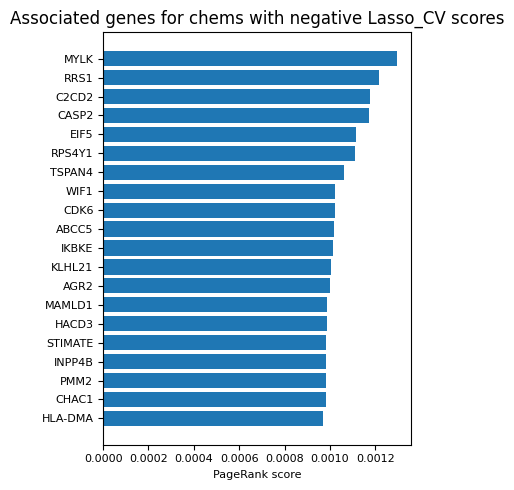

In [53]:
low_chems_top_genes = [x for x in high_chems_top_nodes if x['category'] == 'Gene']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in low_chems_top_genes[:20][::-1]], [x['score'] for x in low_chems_top_genes[:20][::-1]], )
plt.title('Associated genes for chems with negative Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

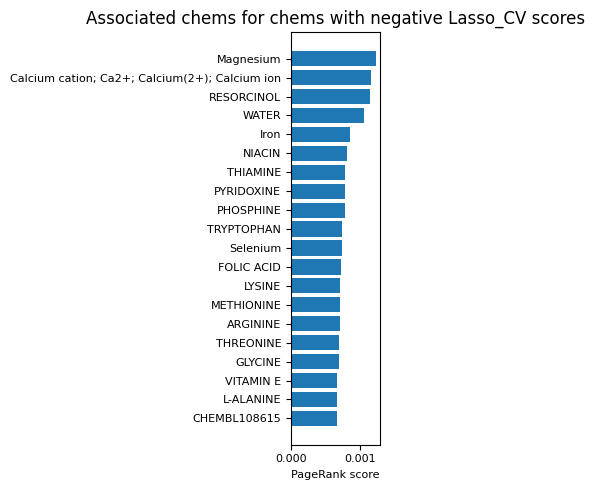

In [54]:
low_chems_top_chems = [x for x in low_chems_top_nodes if x['category'] == 'Compound']

fig, ax = plt.subplots(figsize=(4, 5))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.barh([x['feature_name'] for x in low_chems_top_chems[:20][::-1]], [x['score'] for x in low_chems_top_chems[:20][::-1]], )
plt.title('Associated chems for chems with negative Lasso_CV scores')
ax.set_xlabel('PageRank score', fontsize=8)
plt.tight_layout()

### TODO: pagerank plots for biological-only spoke

## 5. Get Steiner trees / subgraphs

In [55]:
high_protein_st, high_protein_subgraph = kgfe.explanations.steiner_tree_subgraph(spoke_graph_ud,
                                                                                 high_prots_spoke_ids,
                                                                                 method='takahashi')

In [56]:
low_protein_st, low_protein_subgraph = kgfe.explanations.steiner_tree_subgraph(spoke_graph_ud,
                                                                              low_prots_spoke_ids,
                                                                              method='takahashi')

In [57]:
# TODO: get a connected component from the first chem?

In [58]:
high_chems_st, high_chems_subgraph = kgfe.explanations.steiner_tree_subgraph(spoke_graph_ud,
                                                                            [x[1] for x in high_chems_spoke_ids],
                                                                            method='takahashi')

In [59]:
low_chems_st, low_chems_subgraph = kgfe.explanations.steiner_tree_subgraph(spoke_graph_ud,
                                                                          [x[1] for x in low_chems_spoke_ids],
                                                                          method='takahashi')

## Visualizing subgraphs

In [61]:
import ipycytoscape

In [62]:
# TODO: display the node category somewhere, and display the edge categories
graph_style = [{
                        'selector': 'node[feature_name]',
                             'style': {
                                  'font-family': 'helvetica',
                                  'font-size': '20px',
                                 'label': 'data(feature_name)',
                        }},
                        {'selector': 'node[category="Protein"]',
                         'style': {
                             'background-color': 'blue',
                         }},
                        {'selector': 'node[in_query=1]',
                         'style': {
                             'border-width': '5px',
                             'border-color': 'red',
                         }},
                        {'selector': 'edge[type]',
                         'style': {
                             'label': 'data(type)',
                         }},
                        {"selector": "edge.directed",
                         "style": {
                            "curve-style": "bezier",
                            "target-arrow-shape": "triangle",
                    }},

                    ]

In [63]:
undirected = ipycytoscape.CytoscapeWidget()
high_protein_subgraph_nx = high_protein_subgraph.to_networkx()
node_dict = {i: n['name'] for i, n in high_protein_subgraph_nx.nodes.items()}
high_protein_subgraph_nx = nx.relabel_nodes(high_protein_subgraph_nx, node_dict)
undirected.graph.add_graph_from_networkx(high_protein_subgraph_nx)
undirected.set_tooltip_source('feature_name')
undirected.set_layout(title='high_proteins', nodeSpacing=80, edgeLengthVal=50, )
undirected.set_style(graph_style)

In [64]:
display(undirected)

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'high_proteins', 'nodeSpacing': 80, 'edgeLengthVal'…

In [65]:
low_prots_graph = ipycytoscape.CytoscapeWidget()
low_protein_subgraph_nx = low_protein_subgraph.to_networkx()
node_dict = {i: n['name'] for i, n in low_protein_subgraph_nx.nodes.items()}
low_protein_subgraph_nx = nx.relabel_nodes(low_protein_subgraph_nx, node_dict)
low_prots_graph.graph.add_graph_from_networkx(low_protein_subgraph_nx)
low_prots_graph.set_tooltip_source('name')
low_prots_graph.set_layout(nodeSpacing=80, edgeLengthVal=50)
low_prots_graph.set_style(graph_style)

In [66]:
display(low_prots_graph)

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cytoscape_style=[{'…

In [67]:
high_chems_graph = ipycytoscape.CytoscapeWidget()
high_chems_subgraph_nx = high_chems_subgraph.to_networkx()
node_dict = {i: n['name'] for i, n in high_chems_subgraph_nx.nodes.items()}
high_chems_subgraph_nx = nx.relabel_nodes(high_chems_subgraph_nx, node_dict)
high_chems_graph.graph.add_graph_from_networkx(high_chems_subgraph_nx)
high_chems_graph.set_tooltip_source('name')
high_chems_graph.set_layout(nodeSpacing=80, edgeLengthVal=50)
high_chems_graph.set_style(graph_style)

In [68]:
display(high_chems_graph)

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cytoscape_style=[{'…

In [69]:
low_chems_graph = ipycytoscape.CytoscapeWidget()
low_chems_subgraph_nx = low_chems_subgraph.to_networkx()
node_dict = {i: n['name'] for i, n in low_chems_subgraph_nx.nodes.items()}
low_chems_subgraph_nx = nx.relabel_nodes(low_chems_subgraph_nx, node_dict)
low_chems_graph.graph.add_graph_from_networkx(low_chems_subgraph_nx)
low_chems_graph.set_tooltip_source('name')
low_chems_graph.set_layout(nodeSpacing=80, edgeLengthVal=50)
low_chems_graph.set_style(graph_style)

In [70]:
display(low_chems_graph)

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cytoscape_style=[{'…